In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb 
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import StandardScaler


In [ ]:
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [ ]:
sales_train = sales_train[sales_train.item_price<3000]
sales_train = sales_train[sales_train.item_cnt_day<1001]

In [ ]:
item_categories.head(100)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
print(item_categories.shape)

(84, 2)


In [ ]:
items.head(60)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [ ]:
print(items.shape)

(22170, 3)


In [ ]:
sales_train.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [ ]:
print(sales_train.shape)

(2935849, 6)


In [ ]:
sales_train_cop = sales_train.copy(deep = True)
sales_train_new = sales_train.copy(deep = True)
test_new =test.copy(deep = True)

In [ ]:
sales_train_all = sales_train_new.merge(items,left_on='item_id', right_on='item_id')
sales_train_all = sales_train_all.merge(item_categories, left_on='item_category_id', right_on='item_category_id')
sales_train_all = sales_train_all.merge(shops, left_on='shop_id', right_on='shop_id')
sales_train_all

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2844577,22.10.2015,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2844578,21.09.2015,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2844579,16.09.2015,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2844580,22.09.2015,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


In [ ]:
test_all = test_new.merge(items, left_on='item_id', right_on='item_id')
test_all = test_all.merge(item_categories, left_on='item_category_id', right_on='item_category_id')
test_all = test_all.merge(shops, left_on='shop_id', right_on='shop_id')
test_all

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
2,15,5,4872,"Minecraft. Playstation 3 Edition [PS3, русская...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
3,21,5,5002,"NBA 2K16 [PS3, русская документация]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
4,23,5,5814,"Plants vs. Zombies Garden Warfare [PS3, русска...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
...,...,...,...,...,...,...,...
214195,213658,45,342,"1С:Аудиокниги. Путеводитель. Прага [PC, Цифров...",44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214196,213659,45,254,1С:Аудиокниги. Илья Ильин. Если бы я был робин...,44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214197,213660,45,204,"1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Ци...",44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214198,213661,45,180,1С:Аудиокниги. Былины русского народа. Сборник...,44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""


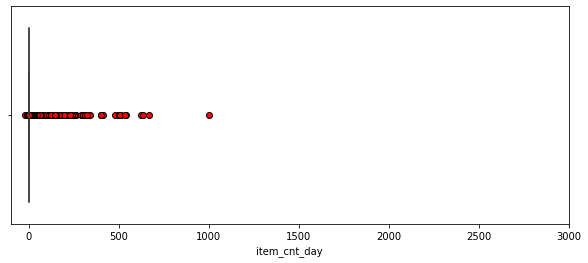

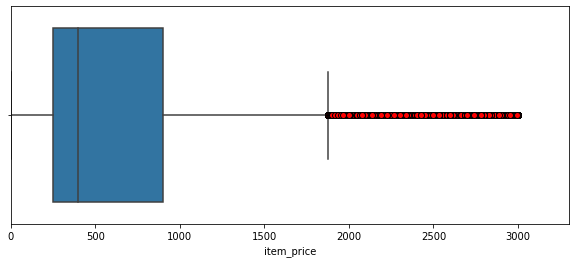

In [ ]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='red', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=sales_train_all.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(sales_train_all.item_price.min(), sales_train_all.item_price.max()*1.1)
sns.boxplot(x=sales_train_all.item_price, flierprops=flierprops)

In [ ]:
sales_train.loc[sales_train.shop_id == 0, 'shop_id'] = 57
test_all.loc[test_all.shop_id == 0, 'shop_id'] = 57

sales_train.loc[sales_train.shop_id == 1, 'shop_id'] = 58
test_all.loc[test_all.shop_id == 1, 'shop_id'] = 58

sales_train.loc[sales_train.shop_id == 10, 'shop_id'] = 11
test_all.loc[test_all.shop_id == 10, 'shop_id'] = 11

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile_final = ProfileReport(sales_train_all, title="Report", explorative=True, minimal=True)

In [ ]:
profile_final.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## ***СМОТРИМ МЕТРИКИ ДЛЯ РАБОТЫ***

In [ ]:
sales_train_cop["date"]= pd.to_datetime(sales_train_cop["date"], format='%d.%m.%Y')
sales_train_cop.sort_values(by="date", ascending=True, inplace=True)
print(sales_train_cop)

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
104991  2013-01-01               0       41    20052      249.00           1.0
85191   2013-01-01               0       54    11670      149.00           1.0
100094  2013-01-01               0       51    14222      170.00           1.0
102679  2013-01-01               0       38     9298     2289.00           1.0
111304  2013-01-01               0       42     6681     1794.71           1.0
...            ...             ...      ...      ...         ...           ...
2894089 2015-10-31              33       35    10551      299.00           1.0
2932370 2015-10-31              33       25    13241      450.00           3.0
2890492 2015-10-31              33       31    15256      399.00           1.0
2932380 2015-10-31              33       25    13246      359.00           2.0
2910451 2015-10-31              33       15     2808     1499.00           1.0

[2844582 rows x 6 columns]


In [ ]:
sales_train_cop["Year"] = sales_train_cop["date"].dt.year
sales_train_cop["Month"] = sales_train_cop["date"].dt.month

In [ ]:
item_price_metrics = sales_train_cop.groupby(by=['item_id', 'shop_id'])['item_price'].agg([
    'sum', 'min','max','mean','median','std']).reset_index()
item_price_metrics.head()

,item_id,shop_id,sum,min,max,mean,median,std
0,0,54,58.0,58.0,58.0,58.0,58.0,NaN
1,2,54,116.0,58.0,58.0,58.0,58.0,0.000000
2,3,54,158.0,58.0,100.0,79.0,79.0,29.698485
3,4,54,58.0,58.0,58.0,58.0,58.0,NaN
4,5,54,28.0,28.0,28.0,28.0,28.0,NaN


## -Для одного и тогоже товара разная цена в магазинах,
## -На самом деле в каждом магазине есть разница в цене одного и того же товара. - Возможно, цена варьируется в зависимости от месяца -- Давайте проверим.
## -Один и тот же продукт был продан по цене от 3000 до 6000

Распределение цены товара


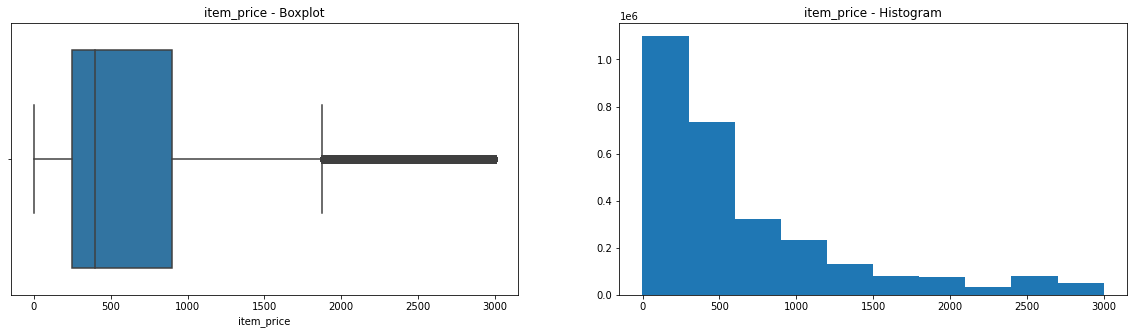

In [ ]:
print('Распределение цены товара')
fig, ax = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='item_price', data=sales_train_cop,ax=ax[0])
ax[1].hist(sales_train_cop['item_price'])
ax[0].set_title('item_price - Boxplot')
ax[1].set_title('item_price - Histogram')
plt.show()

Распределение цены товара ежемесячно


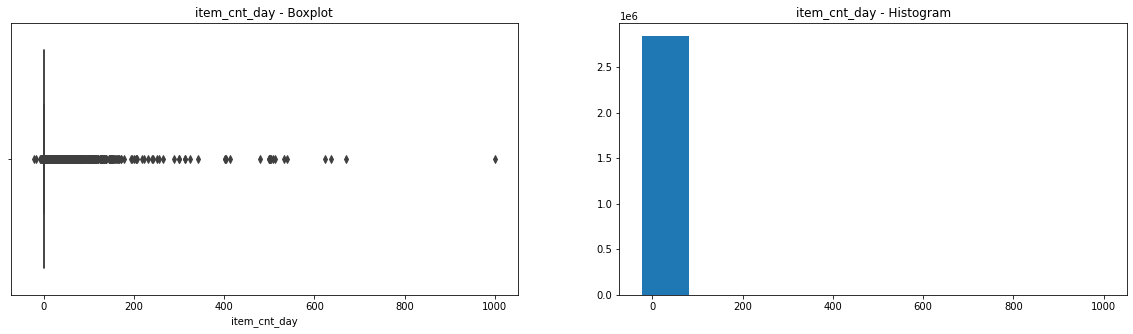

In [ ]:
print('Распределение цены товара ежемесячно')
fig, ax = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='item_cnt_day', data=sales_train_cop,ax=ax[0])
ax[1].hist(sales_train_cop['item_cnt_day'])
ax[0].set_title('item_cnt_day - Boxplot')
ax[1].set_title('item_cnt_day - Histogram')
plt.show()

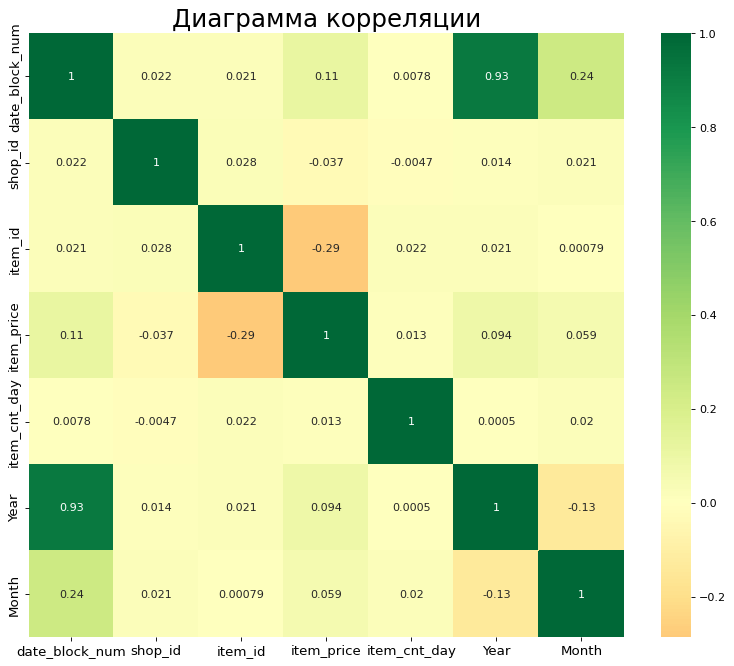

In [ ]:
df = sales_train_cop

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Corr', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

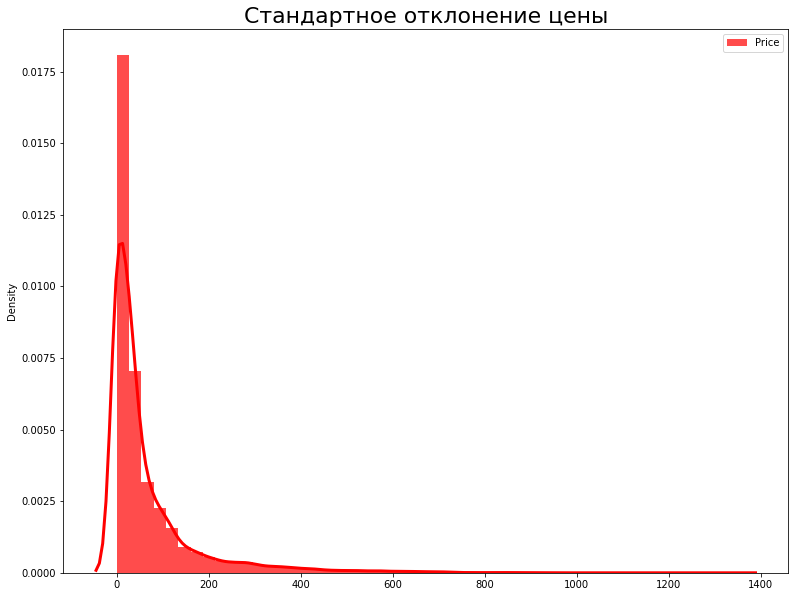

In [ ]:
g = sales_train_cop.groupby(by=['item_id']).agg({'item_price':'std'}).fillna(0)

plt.figure(figsize=(13,10))
sns.distplot(g, label="Price",color = 'red', hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.title('STD', fontsize=22)
plt.legend()
plt.show()

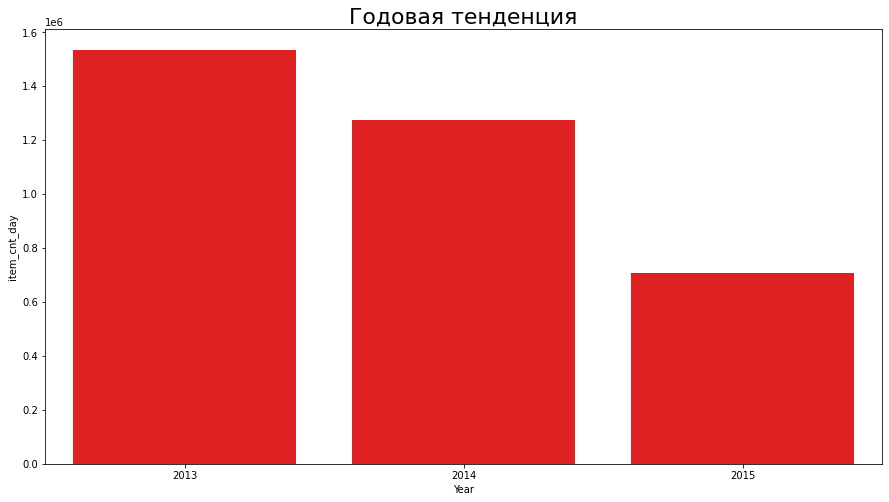

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
g = sales_train_cop.groupby(by=['Year'])['item_cnt_day'].sum().reset_index()
sns.barplot(x='Year', y='item_cnt_day', data=g, color = 'red')
plt.title('Global price', size = 22)
plt.show()

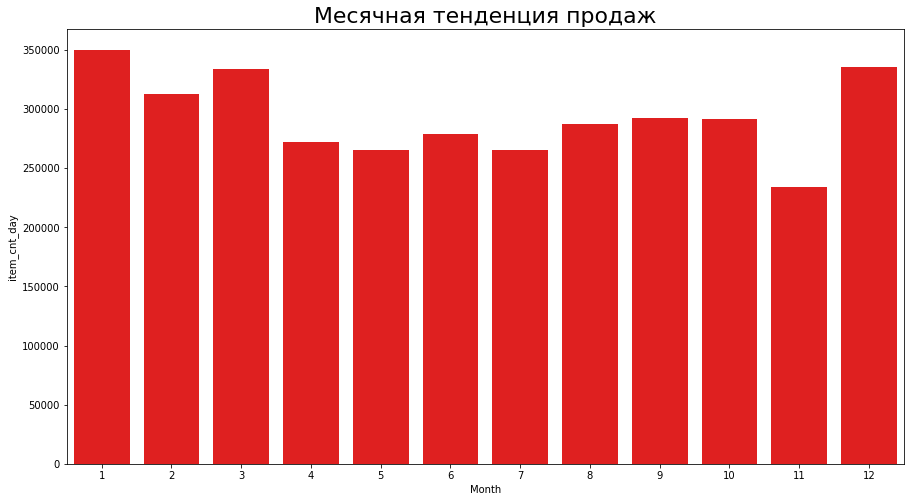

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
a = sales_train_cop.groupby(by=['Month'])['item_cnt_day'].sum().reset_index()
sns.barplot(x='Month', y='item_cnt_day', data=a, color = 'red')
plt.title('Month', size = 22)
plt.show()

In [ ]:
sales = sales_train_cop.groupby(by=['shop_id'])['item_cnt_day'].sum().reset_index()
sales = sales.sort_values(by = 'item_cnt_day', ascending=False)

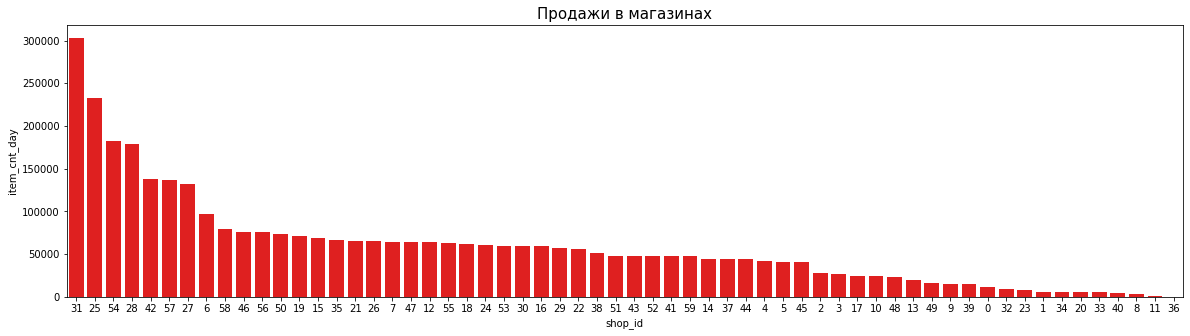

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='shop_id', y='item_cnt_day', data=sales,order=sales.index, color = 'red')
ax.set_title('shope sale', size = 15)
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

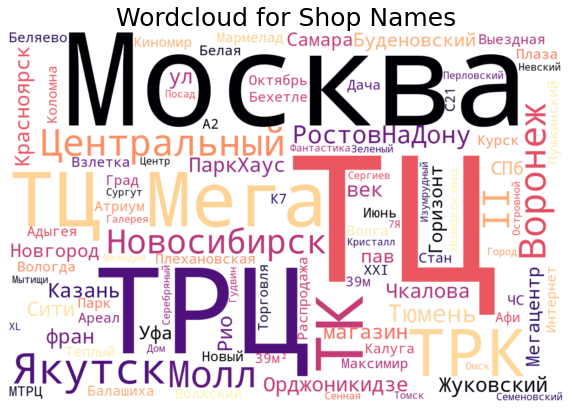

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='magma',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(shops['shop_name']))


plt.title('Wordcloud for Shop Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

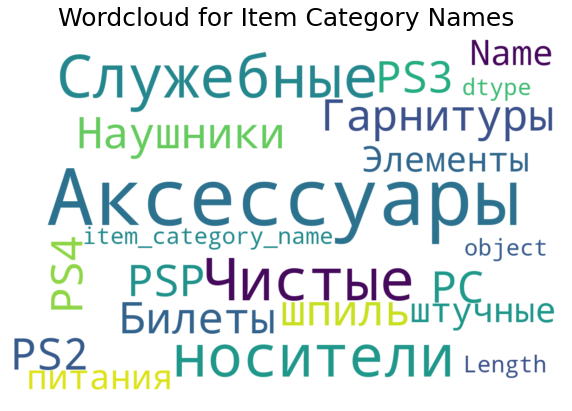

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='viridis',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(item_categories['item_category_name']))


plt.title('Wordcloud for Item Category Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

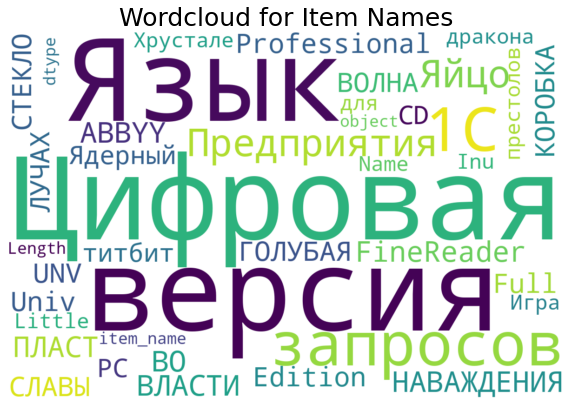

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='viridis',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(items['item_name']))


plt.title('Wordcloud for Item Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

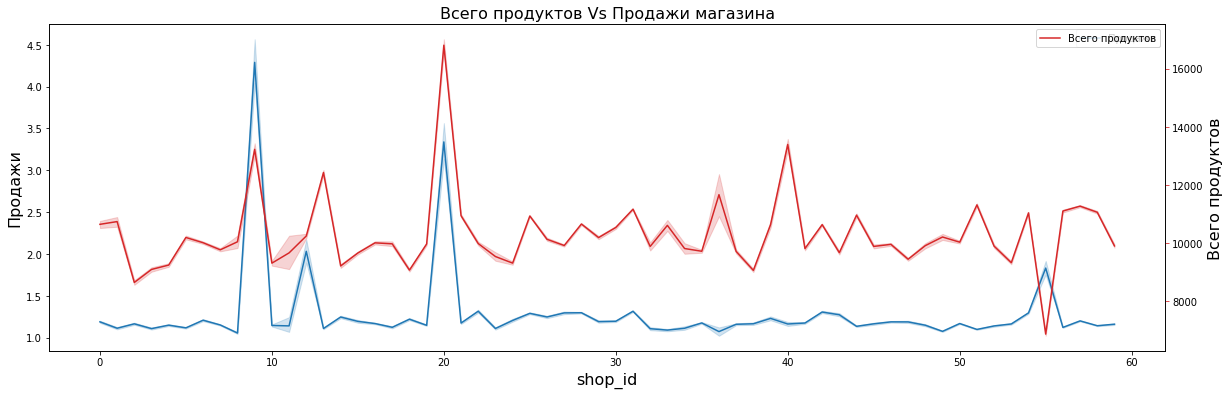

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('items Vs sales', fontsize=16)
ax1.set_xlabel('shop_id', fontsize=16)
ax1.set_ylabel('Продажи', fontsize=16)
ax1 = sns.lineplot(x='shop_id', y='item_cnt_day', data=sales_train_cop, palette='summer')
ax1.tick_params(axis='y')
plt.legend(['sales'])
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('items', fontsize=16)
ax2 = sns.lineplot(x='shop_id', y='item_id', data = sales_train_cop, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['items'])
plt.show()

In [ ]:
sales_train_all['Sales_per_item'] = sales_train_all['item_cnt_day'] * sales_train_all['item_price']
sales_train_all

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,Sales_per_item
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.0
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150.0
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",598.0
...,...,...,...,...,...,...,...,...,...,...,...
2844577,22.10.2015,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн,250.0
2844578,21.09.2015,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн,1000.0
2844579,16.09.2015,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн,2500.0
2844580,22.09.2015,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн,5000.0


In [ ]:
print(f'shape of data before removing outliers: {sales_train_all.shape}')
sales_train_all = sales_train_all[sales_train_all['item_price'] >= 0]
upper_quantile = sales_train_all['item_price'].quantile(0.95)
sales_train_all['item_price'] = np.where(sales_train_all['item_price'] > upper_quantile, upper_quantile, sales_train_all['item_price'])
print(f'shape of data after removing outliers: {sales_train_all.shape}')

print(f'Minimum price of a single item {sales_train_all["item_price"].min()}')
print(f'Maximum price ofa single item {sales_train_all["item_price"].max()}')

shape of data before removing outliers: (2844582, 11)
shape of data after removing outliers: (2844581, 11)
Minimum price of a single item 0.07
Maximum price ofa single item 2363.0


In [ ]:
print(f'Minimum value {sales_train_all["item_cnt_day"].min()}')
print(f'Maximum value {sales_train_all["item_cnt_day"].max()}')

Minimum value -22.0
Maximum value 1000.0


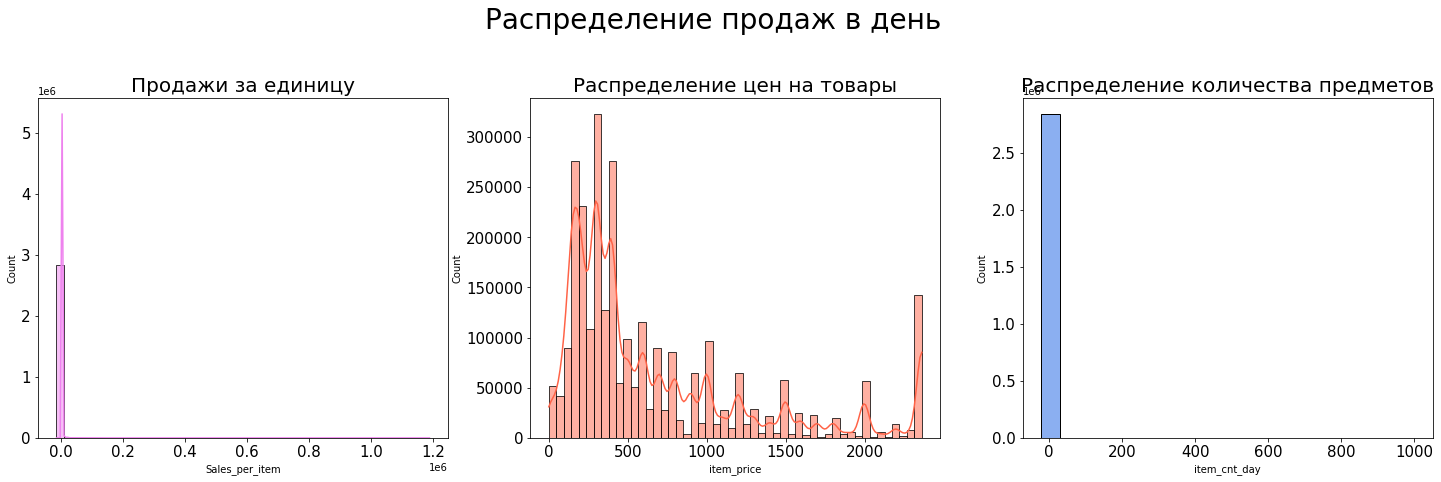

In [ ]:
fig = plt.figure(figsize=(25,7))
gs = fig.add_gridspec(1, 3)
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
# setting size of xlabel and ylabel
ax00.tick_params(axis='both', labelsize=15)
ax01.tick_params(axis='both', labelsize=15)
ax02.tick_params(axis='both', labelsize=15)
ax00.set_title('sales for one', fontsize=20)
ax01.set_title('items price', fontsize=20)
ax02.set_title('item_cnt_day', fontsize=20)
sns.histplot(data = sales_train_all ,x="Sales_per_item", kde=True, bins=50,ax=ax00, color="violet")
sns.histplot(data = sales_train_all ,x="item_price", kde=True, ax=ax01, bins=50, color="tomato")
sns.histplot(data = sales_train_all ,x="item_cnt_day", kde=False, ax=ax02, bins=20, color="cornflowerblue")

fig.subplots_adjust(top=0.8)
fig.suptitle('daily', fontsize="28");

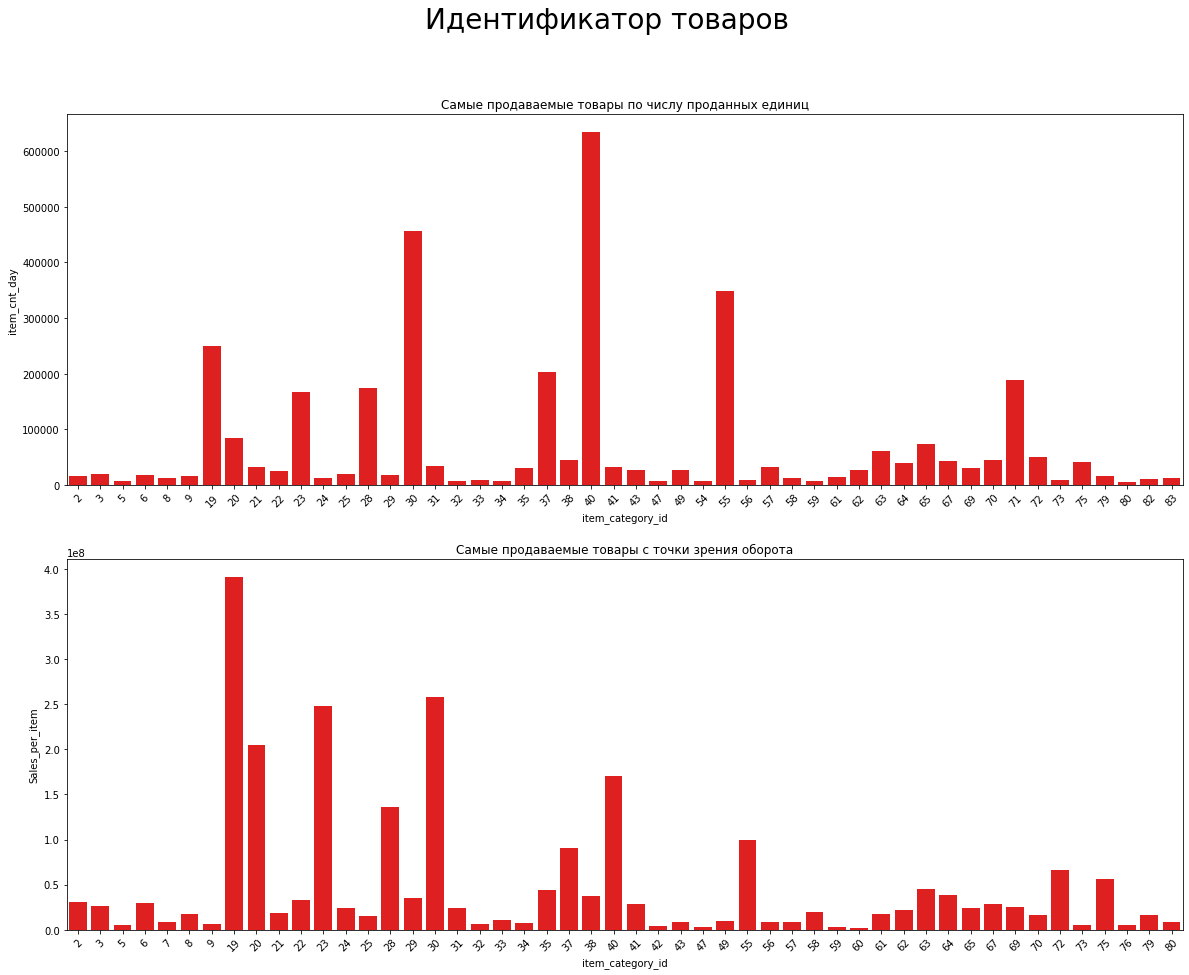

In [ ]:
df_tmp = sales_train_all[["item_category_id","Sales_per_item","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["item_category_id"],aggfunc={"item_cnt_day":np.sum,"Sales_per_item":np.sum}).reset_index()
df_tmp_sales = df_tmp.sort_values(by=['Sales_per_item'],ascending=False).head(50).reset_index(drop=True)
df_tmp_count = df_tmp.sort_values(by=['item_cnt_day'],ascending=False).head(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x=df_tmp_count["item_category_id"],y=df_tmp_count["item_cnt_day"],ax=axes[0], color = 'red')
axes[0].set_title("Top item")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=df_tmp_sales["item_category_id"],y=df_tmp_sales["Sales_per_item"],ax=axes[1], color = 'red')
axes[1].set_title('top item cat')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Идентификатор товаров', fontsize="28")
plt.show()
del df_tmp,df_tmp_count,df_tmp_sales

### Новая модель

In [ ]:
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [ ]:
train = train[(train['item_price'] < 50000 )& (train['item_cnt_day'] < 1000) & (train['item_price'] > 0)]

item_transaction_count=train.groupby(['item_id'])['date'].count()
item_max_date_block=train.groupby(["item_id"])["date_block_num"].max()
item_nb_transactions_last_date_block=pd.concat([item_transaction_count,item_max_date_block],axis=1)
item_nb_transactions_last_date_block.columns=['nbr_transactions','last_sale']
items_to_drop=item_nb_transactions_last_date_block[(item_nb_transactions_last_date_block['nbr_transactions']<10) & (item_nb_transactions_last_date_block['last_sale']<22)]
print('Shapes before the drop: ',train.shape,items.shape,items_to_drop.shape)
train=train[~train['item_id'].isin(list(items_to_drop.index))]
print('Shapes after the drop: ',train.shape)

Shapes before the drop:  (2935843, 6) (22170, 3) (4154, 2)
Shapes after the drop:  (2923256, 6)


In [ ]:
train['shop_id']=train['shop_id'].replace({0:57,1:58,11:10,40:39}) #,,23:34
train=train[~train['shop_id'].isin([8,9,20,23,32])]
test['shop_id']=test['shop_id'].replace({0:57,1:58,11:10,40:39})

train=train.loc[train['shop_id'].isin(test['shop_id'].unique()),:] 
train.reset_index(drop = True,inplace=True)
test.reset_index(drop = True,inplace=True)
print('Shapes after the drop: ',train.shape)

Shapes after the drop:  (2424153, 6)


In [ ]:
shops.loc[ shops['shop_name'] == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"'
shops["city"] = shops['shop_name'].str.split(" ").map( lambda x: x[0] )
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"
shops["shop_city"] = LabelEncoder().fit_transform( shops["city"] )

shops["category"] = shops['shop_name'].str.split(" ").map( lambda x: x[1] )
shop_location_dict={'ТК':1,'ТЦ':4,'ТРК':2,'ТРЦ':3,'МТРЦ':0}
shops['shop_category'] = shops['category'].apply( lambda x: shop_location_dict[x] if x in shop_location_dict else 0 )



In [ ]:
shops.head(10)

,shop_name,shop_id,city,shop_city,category,shop_category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,29,"Орджоникидзе,",0
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,29,ТЦ,4
2,"Адыгея ТЦ ""Мега""",2,Адыгея,0,ТЦ,4
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,1,ТРК,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,2,ТЦ,4
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,3,ТРЦ,3
6,"Воронеж (Плехановская, 13)",6,Воронеж,4,"(Плехановская,",0
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,4,ТРЦ,3
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,4,ТРЦ,3
9,Выездная Торговля,9,Выездная,5,Торговля,0


In [ ]:
shops = shops[["shop_id", "shop_category", "shop_city"]]

In [ ]:
cats = item_categories.copy(deep = True)
cats_type_code= cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)
print(cats_type_code.value_counts())

Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Служебные      2
Чистые         2
PC             1
Билеты         1
Доставка       1
Элементы       1
Name: item_category_name, dtype: int64


In [ ]:
cats["sub_type_code1"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)
    #cats.loc[ (cats.type_code == "Игровые")| (cats.type_code == "Аксессуары"), "category" ] = "Игры"
category = []
for cat in cats["sub_type_code1"].unique():
  if len(cats[cats["sub_type_code1"] == cat]) >= 5:
    category.append( cat )
    cats["sub_type_code1"] = cats["sub_type_code1"].apply(lambda x: x if (x in category) else "others")
    cats["type_code"] = cats["sub_type_code1"]
    cats["sub_type_code2"] = cats["sub_type_code1"]
    cats.loc[ (cats["sub_type_code1"] == "Игровые")| (cats["sub_type_code1"] == "Аксессуары"), "type_code" ] = "Игры"
    cats.loc[cats['sub_type_code1']=='Игры','sub_type_code2']=cats['item_category_name'].str[:8]
    cats.loc[cats['sub_type_code1']=='Аксессуары','sub_type_code2']=cats['item_category_name'].str[:15]
    cats.loc[cats['sub_type_code1']=='Игровые','sub_type_code2']=cats['item_category_name'].str[:20]
cats

,item_category_name,item_category_id,sub_type_code1,type_code,sub_type_code2
0,PC - Гарнитуры/Наушники,0,others,others,others
1,Аксессуары - PS2,1,Аксессуары,Игры,Аксессуары - PS
2,Аксессуары - PS3,2,Аксессуары,Игры,Аксессуары - PS
3,Аксессуары - PS4,3,Аксессуары,Игры,Аксессуары - PS
4,Аксессуары - PSP,4,Аксессуары,Игры,Аксессуары - PS
...,...,...,...,...,...
79,Служебные,79,others,others,others
80,Служебные - Билеты,80,others,others,others
81,Чистые носители (шпиль),81,others,others,others
82,Чистые носители (штучные),82,others,others,others


In [ ]:
cats["type_code"] = LabelEncoder().fit_transform(cats["type_code"])
cats["sub_type_code1"] = LabelEncoder().fit_transform(cats["sub_type_code1"])
cats["sub_type_code2"] = LabelEncoder().fit_transform(cats["sub_type_code2"])
# Removing the name and leaving numerical values only 
cats = cats[["item_category_id", "sub_type_code1","sub_type_code2", "type_code"]]

In [ ]:
cats

,item_category_id,sub_type_code1,sub_type_code2,type_code
0,0,0,0,0
1,1,1,1,1
2,2,1,1,1
3,3,1,1,1
4,4,1,1,1
...,...,...,...,...
79,79,0,0,0
80,80,0,0,0
81,81,0,0,0
82,82,0,0,0


In [ ]:
from itertools import product

In [ ]:
matrix = []

for i in range(34):
  sales = train[train.date_block_num == i]
  matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

matrix = pd.DataFrame(np.vstack(matrix), columns = aggregation_cols)
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( aggregation_cols, inplace = True )

# add revenue to train df
group = train.groupby(aggregation_cols).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = aggregation_cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)

# Create a test set for month 34.
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

# Concatenate train and test sets.
matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=aggregation_cols)
matrix.fillna( 0, inplace = True )

# Add shop, items and categories data onto matrix df.
matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, cats, on = ["item_category_id"], how = "left" )
matrix["shop_city"] = matrix["shop_city"].astype(np.int8)
matrix["shop_category"] = matrix["shop_category"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["sub_type_code1"] = matrix["sub_type_code1"].astype(np.int8)
matrix["sub_type_code2"] = matrix["sub_type_code2"].astype(np.int8)
matrix["type_code"] = matrix["type_code"].astype(np.int8)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(grouped_train, target, test_size=10_000)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1556443, 3), (10000, 3), (1556443,), (10000,))

### SCORE = 1,9

In [ ]:
from google.colab import files

In [ ]:
files.download("submission.csv")

In [ ]:
'''from itertools import product
import random

booster = 'gbtree'
silent = 0

eta = [0.01,0.1,0.2]  #learning rate in gbm
min_child_weight = [1,0.5,0.25]  #minimum sum of weights of all observations required in a child
max_depth = [2,3,4]  #maximum depth of the tree
gamma = [0,1]  #a split will occur only when reduction in loss function > gamma 
subsample = [0.5,0.7] #fraction of rows to be sampled to make a decision tree
colsample_bytree = [0.5,0.7] #fraction of columns to be sampled to make a decision tree
lambda_ = [0.4,0.8] #L2 regularization weights
alpha = [0,1]  #L1 reg weights

params =  [eta,min_child_weight,max_depth,gamma,subsample,colsample_bytree,alpha]
parameters = list(product(*params))
parameters = random.sample(parameters,50)
len(parameters)


min_rmse = float('inf')
best_params = parameters[0]
for p in parameters:
  eta = p[0]
  min_child_weight = p[1]
  max_depth = p[2]
  gamma = p[3]
  subsample = p[4]
  colsample_bytree = p[5]
  alpha = p[6]

print('Random Search On Hyperparamters Xgboost')
print(f"Fitting params -> eta: {eta},\
min_child_weight: {min_child_weight} , max_depth:{max_depth}, gamma: {gamma}, subsample : {subsample}, \
col_sample_bytree: {colsample_bytree:},alpha: {alpha}")
model_x = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,
                         eta=eta,min_child_weight=min_child_weight,max_depth=max_depth,gamma=gamma,
                         subsample=subsample,colsample_bytree=colsample_bytree,alpha=alpha)
    
model_x.fit(X_train,y_train)
y_train_pred = model_x.predict(X_train)
y_val_pred = model_x.predict(X_val)
    
train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
val_rmse = mean_squared_error(y_val,y_val_pred,squared=False)

print(f'Train rmse: {train_rmse}')
print(f'Val rmse: {val_rmse}')
    
if val_rmse < min_rmse:
  min_rmse = val_rmse
  best_params = p
print('--'*50)

    
print(f'Found following best parameters: eta: {best_params[0]},\
min_child_weight: {best_params[1]} , max_depth:{best_params[2]}, gamma: {best_params[3]}, subsample : {best_params[4]}, \
col_sample_bytree: {best_params[5]},alpha: {best_params[6]} with validation loss {min_rmse}')'''

In [ ]:
eta = 0.3
gamma = 0
subsample  = 0.8
colsample_bytree = 0.8
alpha = 0
max_depth=8
n_estimators=500
min_child_weight=300
n_jobs = -1   

model = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,
                             eta=eta,min_child_weight=min_child_weight,max_depth=max_depth,gamma=gamma,
                             subsample=subsample,colsample_bytree=colsample_bytree,
                         alpha=alpha,n_estimators = n_estimators,n_jobs = n_jobs)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
    
train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
val_rmse = mean_squared_error(y_val,y_val_pred,squared=False)
    
print(f'Train rmse: {train_rmse}')
print(f'Val rmse: {val_rmse}')

In [ ]:
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':y_test_pred})
submission.to_csv('submission.csv',index=False)
submission.head(10)

In [ ]:
x = test['ID'].head(400)
y_pred =  submission['item_cnt_month'].head(400)
y_true = y_val.head(400)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'Предсказанные значения', color = 'red')
ax.plot(x, y_true, label = 'Истинные', color = 'green')

ax.legend()

plt.show()

In [ ]:
import gc
dfF=pd.concat([X_train,y_train],axis=1)
corr = df.corr(method='spearman')
gc.collect()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap="Blues")

In [ ]:
y_test_pred = pd.DataFrame(y_test_pred)
dfg= pd.concat([X_test,y_test_pred],axis=1)
corr = df.corr(method='spearman')
gc.collect()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap="Blues")

In [ ]:
from google.colab import files

In [ ]:
files.download("submission.csv")

### Нейросеть на ТЕНЗОРЕ

In [ ]:
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [ ]:
train_Data = sales_train.copy() 

#Check NaN
train_Data.isna().sum() 

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
train_Data = train_Data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum') 

In [ ]:
#Combine the test_data to train_Data_Nov for prediction
test_Data = test.copy()
test_Data = test_Data.pivot_table(index = ['shop_id','item_id'],fill_value = 0)
Combine_train_test = pd.merge(test_Data, train_Data, how = 'left', on = ['shop_id','item_id']).fillna(0)

In [ ]:
Combine_train_test = Combine_train_test.sort_values(by = 'ID')

In [ ]:
Combine_train_test.head(10)

ID  (item_cnt_day, 0)  (item_cnt_day, 1)  (item_cnt_day, 2)  \
shop_id item_id                                                                
5       5037      0                0.0                0.0                0.0   
        5320      1                0.0                0.0                0.0   
        5233      2                0.0                0.0                0.0   
        5232      3                0.0                0.0                0.0   
        5268      4                0.0                0.0                0.0   
        5039      5                0.0                0.0                0.0   
        5041      6                0.0                0.0                0.0   
        5046      7                0.0                0.0                0.0   
        5319      8                0.0                0.0                0.0   
        5003      9                0.0                0.0                0.0   

                 (item_cnt_day, 3)  (item_cnt_day, 4)  (item_cnt_day, 5)  \
shop_id item_id                                                            
5       5037                   0.0                0.0                0.0   
        5320                   0.0                0.0                0.0   
        5233                   0.0                0.0                0.0   
        5232                   0.0                0.0                0.0   
        5268                   0.0                0.0                0.0   
        5039                   0.0                0.0                0.0   
        5041                   0.0                0.0                0.0   
        5046                   0.0                0.0                0.0   
        5319                   0.0                0.0                0.0   
        5003                   0.0                0.0                0.0   

                 (item_cnt_day, 6)  (item_cnt_day, 7)  (item_cnt_day, 8)  ...  \
shop_id item_id                                                           ...   
5       5037                   0.0                0.0                0.0  ...   
        5320                   0.0                0.0                0.0  ...   
        5233                   0.0                0.0                0.0  ...   
        5232                   0.0                0.0                0.0  ...   
        5268                   0.0                0.0                0.0  ...   
        5039                   0.0                0.0                0.0  ...   
        5041                   0.0                0.0                0.0  ...   
        5046                   0.0                0.0                0.0  ...   
        5319                   0.0                0.0                0.0  ...   
        5003                   0.0                0.0                0.0  ...   

                 (item_cnt_day, 24)  (item_cnt_day, 25)  (item_cnt_day, 26)  \
shop_id item_id                                                               
5       5037                    2.0                 0.0                 0.0   
        5320                    0.0                 0.0                 0.0   
        5233                    0.0                 0.0                 0.0   
        5232                    0.0                 0.0                 0.0   
        5268                    0.0                 0.0                 0.0   
        5039                    1.0                 0.0                 0.0   
        5041                    0.0                 0.0                 0.0   
        5046                    0.0                 0.0                 1.0   
        5319                    9.0                 2.0                 3.0   
        5003                    0.0                 0.0                 0.0   

                 (item_cnt_day, 27)  (item_cnt_day, 28)  (item_cnt_day, 29)  \
shop_id item_id                                                               
5       5037                    0.0                 1.0        

In [ ]:
sales_train.shape

(2935849, 6)

In [ ]:
Combine_train_test = Combine_train_test.drop(columns = ['ID'])

#Train Data
sales_train = np.array(Combine_train_test.values[:,:-1]).reshape(np.array(Combine_train_test.values[:,:-1]).shape[0],np.array(Combine_train_test.values[:,:-1]).shape[1], 1)
#The target 
train_target = Combine_train_test.values[:,-1:]

test = np.array(Combine_train_test.values[:,1:]).reshape(np.array(Combine_train_test.values[:,1:]).shape[0],np.array(Combine_train_test.values[:,1:]).shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, TimeDistributed, Flatten
from sklearn.model_selection import train_test_split, cross_val_score 

In [ ]:
model = Sequential()
model.add(LSTM(55, return_sequences = True, input_shape = (sales_train.shape[1], 1)))
model.add(LSTM(55, return_sequences = True, ))
model.add(LSTM(55))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

In [ ]:
history_1 = model.fit(sales_train, train_target, epochs = 17, batch_size = 4)
df_his1 = pd.DataFrame(history_1.history)

Epoch 1/17
53550/53550 [==============================] - 1080s 20ms/step - loss: 29.0693 - mse: 29.0693
Epoch 2/17
53550/53550 [==============================] - 1072s 20ms/step - loss: 27.8228 - mse: 27.8228
Epoch 3/17
53550/53550 [==============================] - 1065s 20ms/step - loss: 26.9143 - mse: 26.9143
Epoch 4/17
53550/53550 [==============================] - 1066s 20ms/step - loss: 27.5090 - mse: 27.5090
Epoch 5/17
53550/53550 [==============================] - 1068s 20ms/step - loss: 26.5137 - mse: 26.5137
Epoch 6/17
53550/53550 [==============================] - 1070s 20ms/step - loss: 26.0904 - mse: 26.0904
Epoch 7/17
53550/53550 [==============================] - 1141s 21ms/step - loss: 26.8920 - mse: 26.8920
Epoch 8/17
53550/53550 [==============================] - 1162s 22ms/step - loss: 26.1994 - mse: 26.1994
Epoch 9/17
53550/53550 [==============================] - 1166s 22ms/step - loss: 27.0027 - mse: 27.0027
Epoch 10/17
53550/53550 [==============================

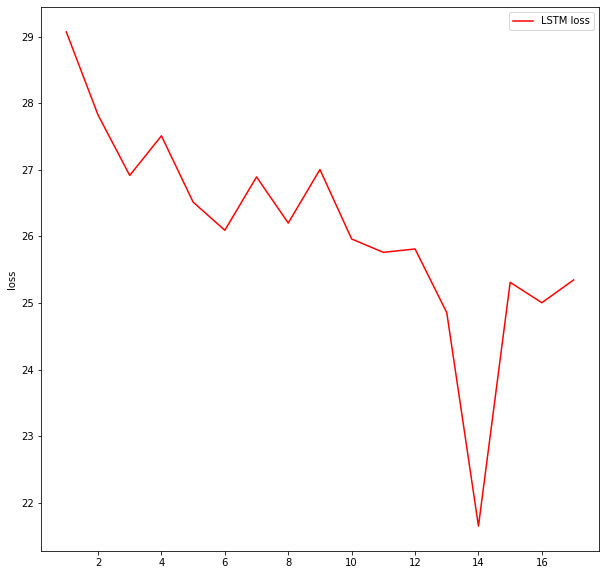

In [ ]:
plt.figure(figsize = (10 , 10))
sns.lineplot(x= df_his1.index + 1, y = df_his1['loss'], color='r', label="LSTM loss")
plt.legend()
plt.show()

In [ ]:
sample_submission['item_cnt_month'] = model.predict(test).clip(0,30).round(0)
sample_submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>